In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load in the data from both the properties csv and the train csv

In [11]:

# load the data frames from there tables
properties_data_types = {22: 'boolean', 32: 'string', 34: 'string', 49: "string", 55: 'string'}

property_data_2016 = pd.read_csv('../../data/properties_2016.csv', dtype=properties_data_types)
error_data_2016 = pd.read_csv('../../data/train_2016_v2.csv', dtype=properties_data_types)

Now we are going to merge into one data frame

In [12]:
merged_data = pd.merge(property_data_2016, error_data_2016, on='parcelid')

print(merged_data.columns)

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

Now we want to plot all the key data and look for patterns, so I have created a simple matplot function that creates a bar plot with semi transparent dots to make density easier to see.

In [13]:
def dot_plot_data(data_frame, x_label, y_label):
    x_data = data_frame[x_label]
    y_data = data_frame[y_label]
    plt.title(f"{x_label} vs {y_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data, s=1, alpha=0.3)
    plt.show()

Now we simply plot all the columns that store graph-able data that and their overlap with logerror.

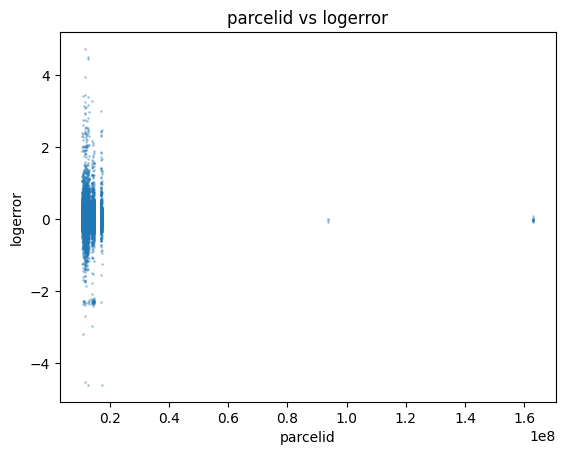

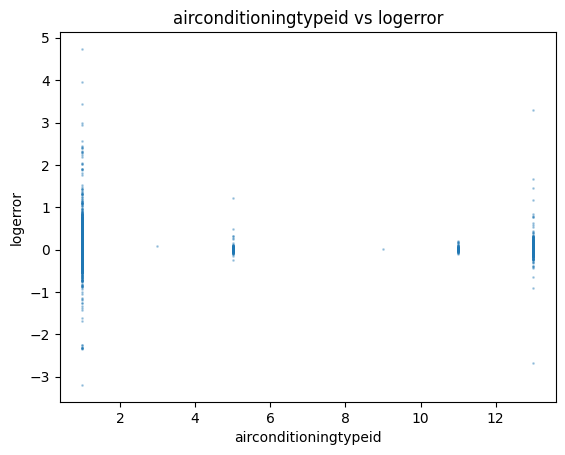

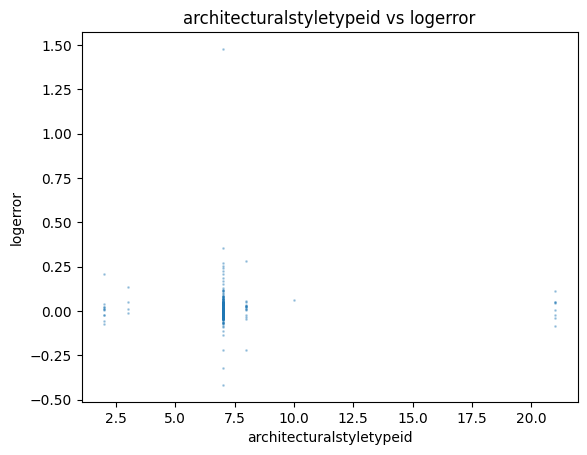

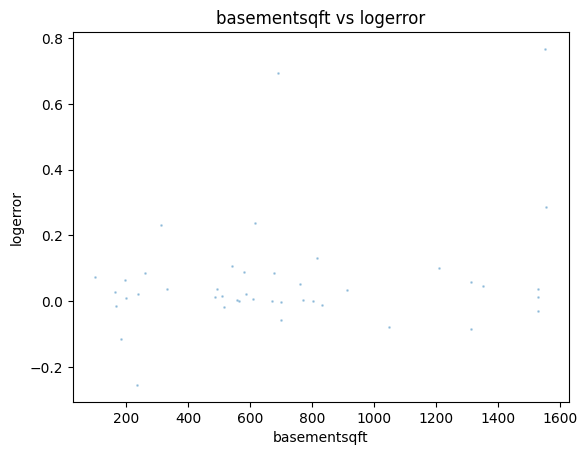

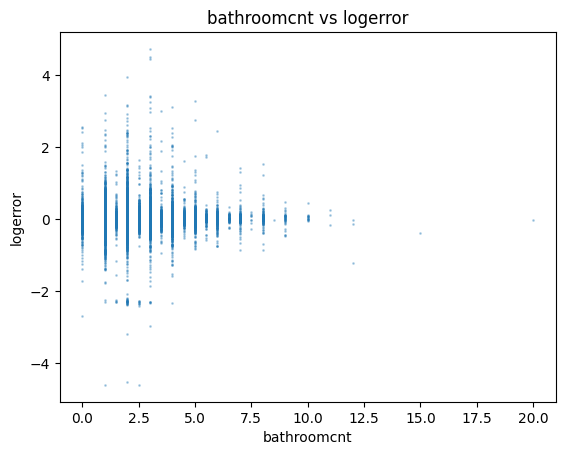

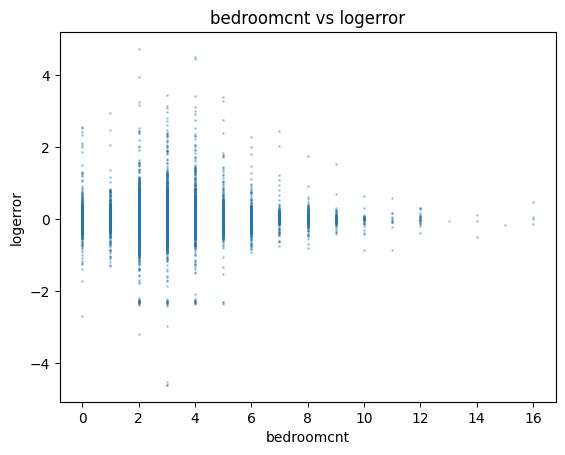

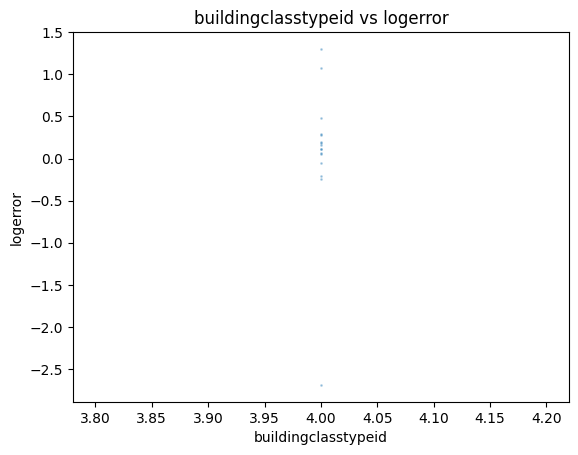

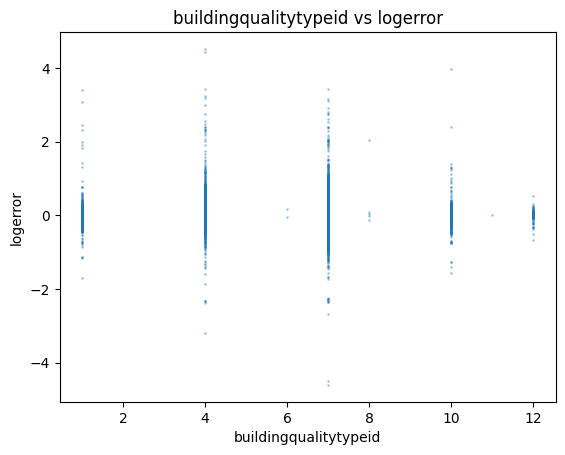

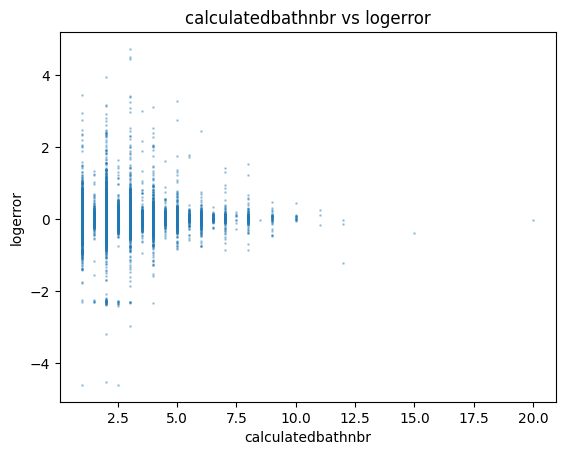

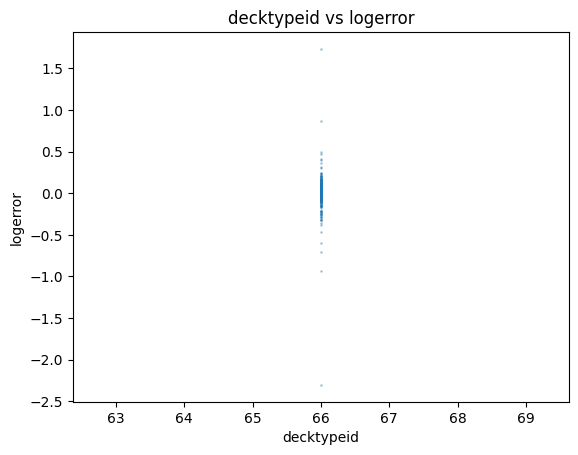

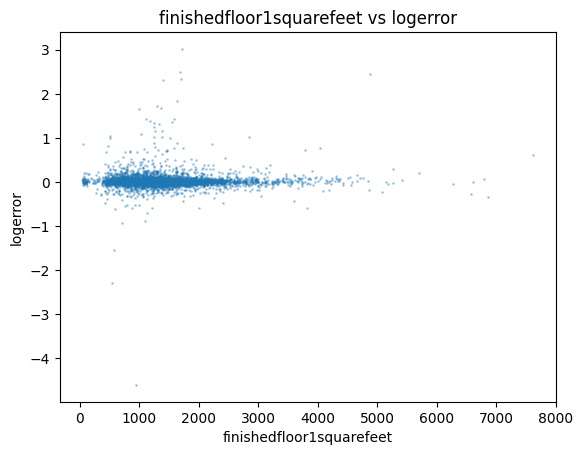

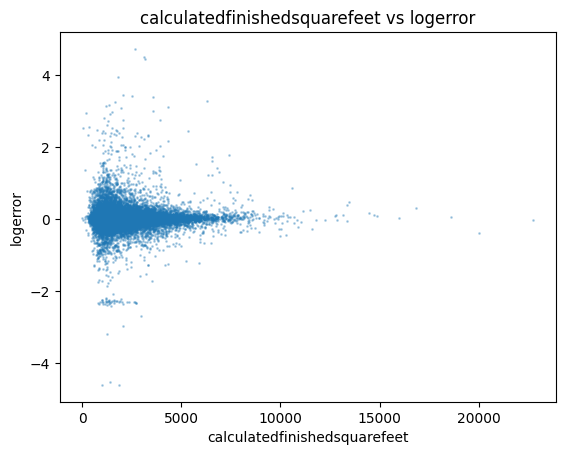

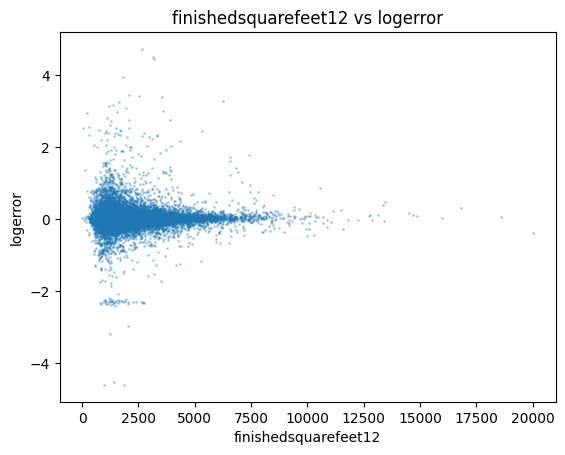

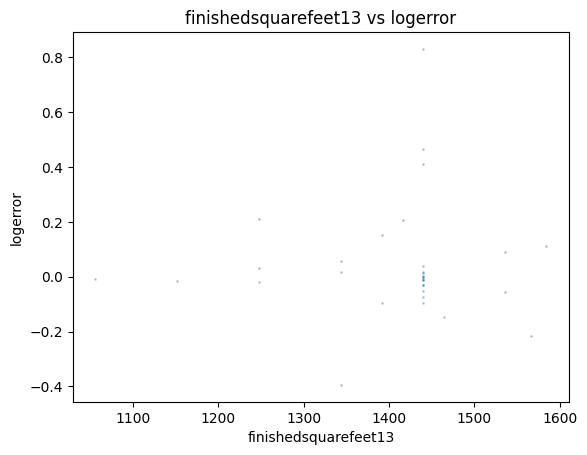

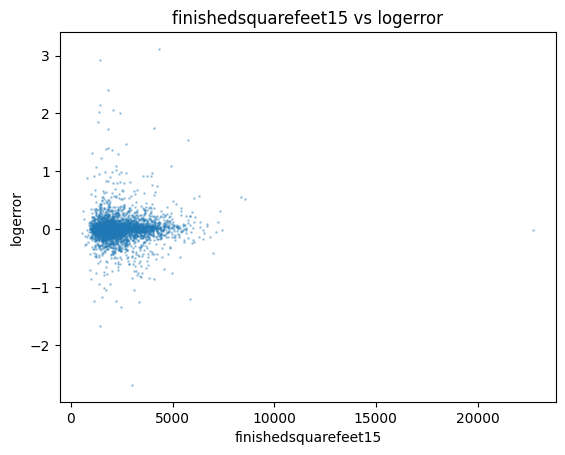

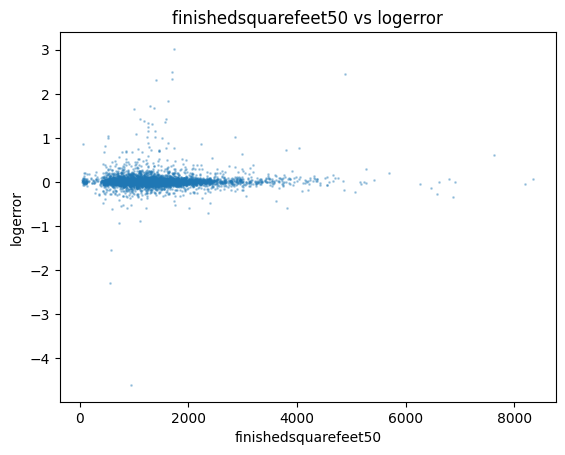

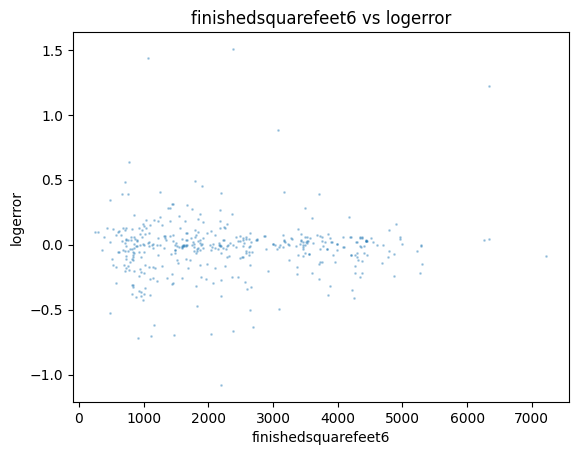

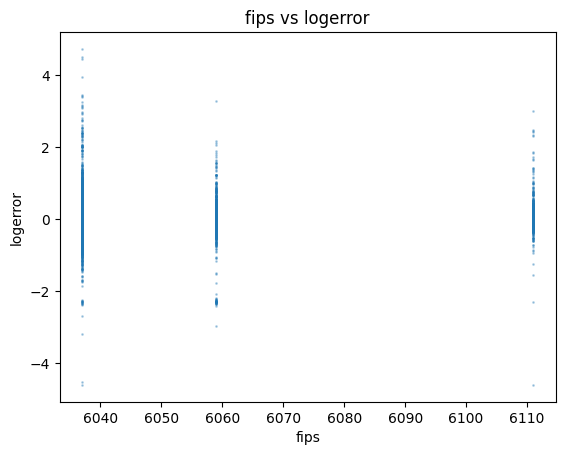

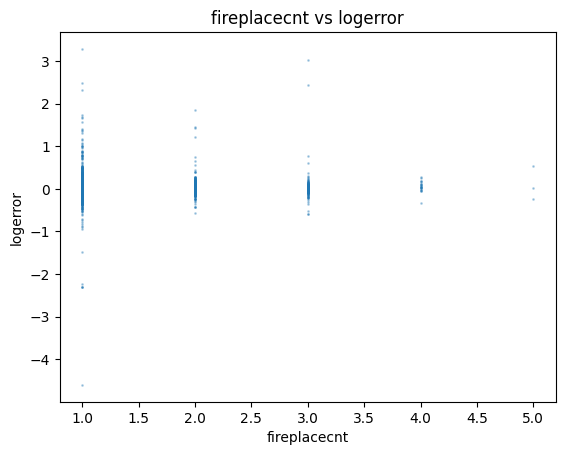

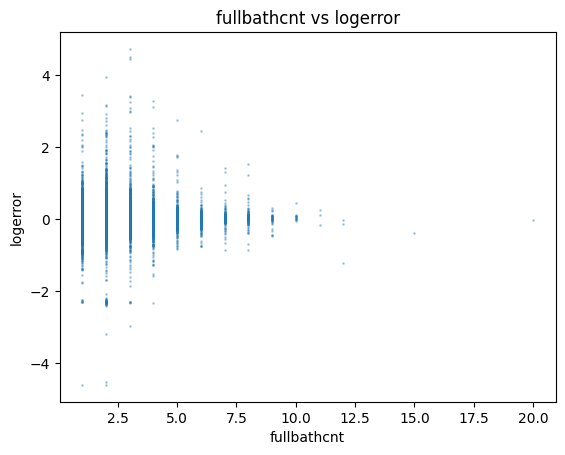

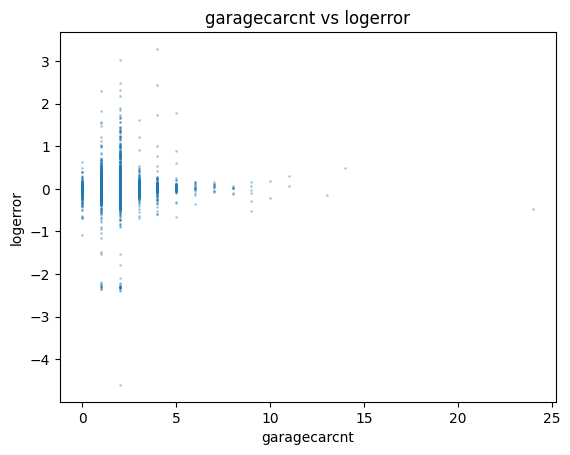

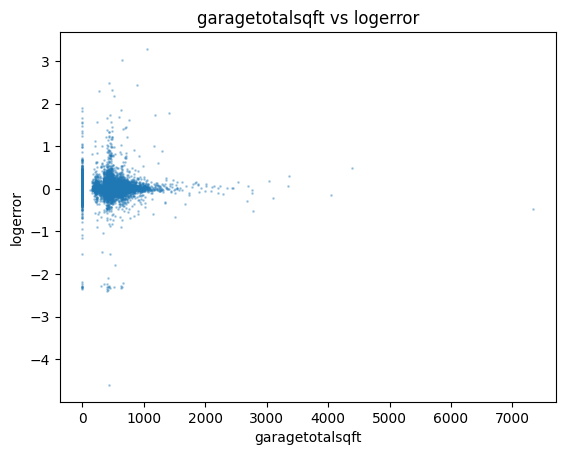

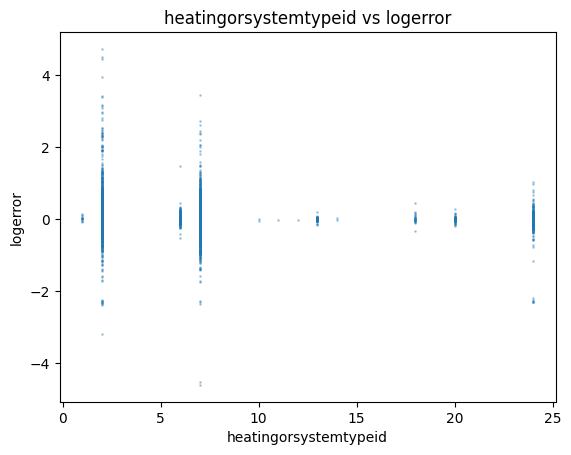

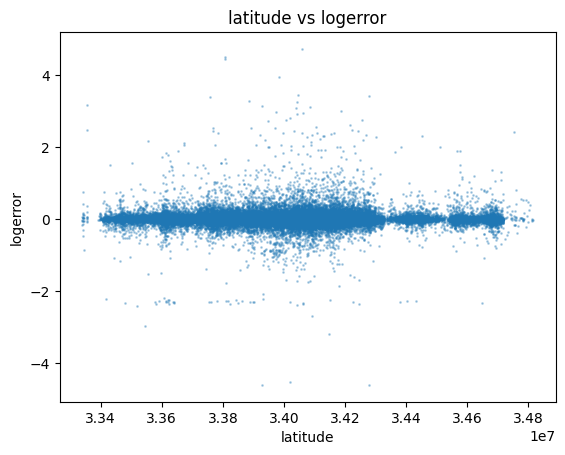

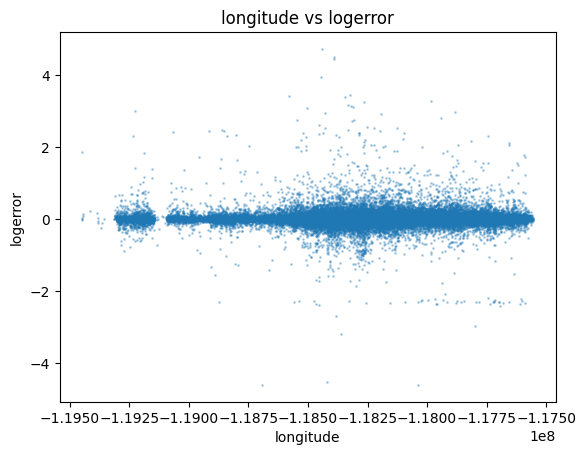

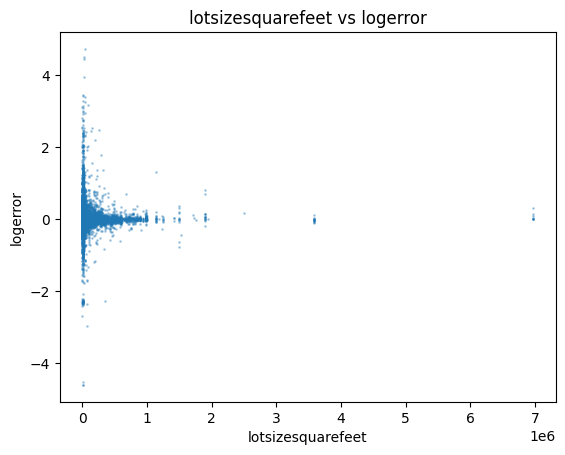

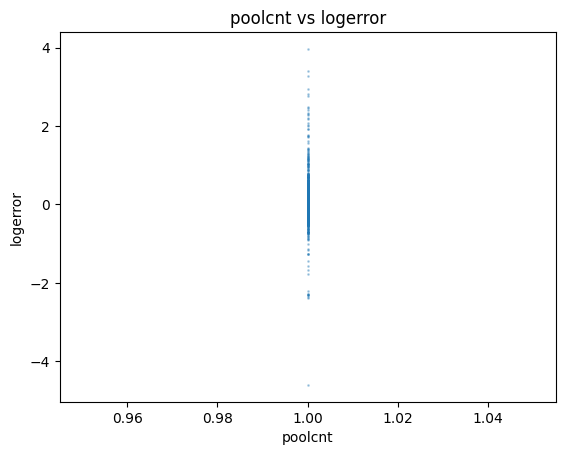

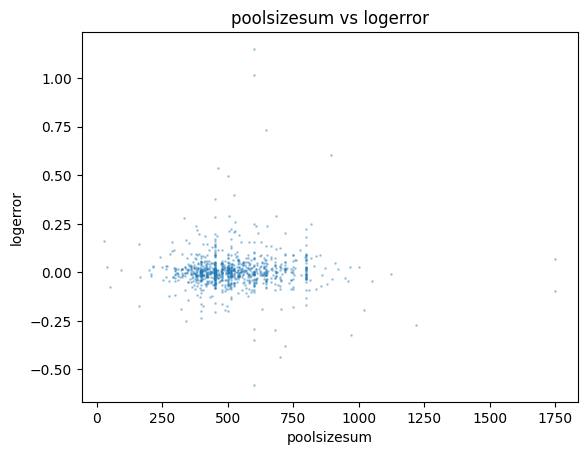

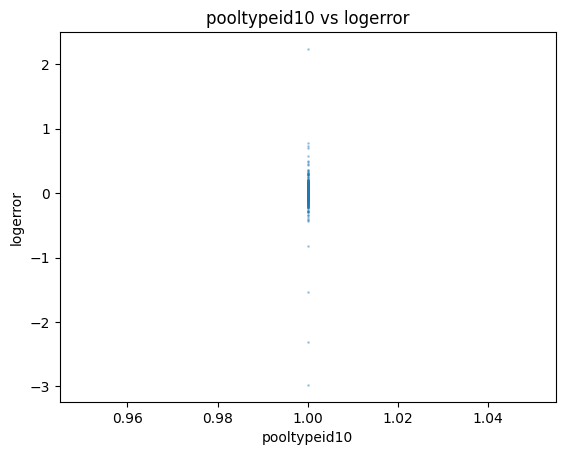

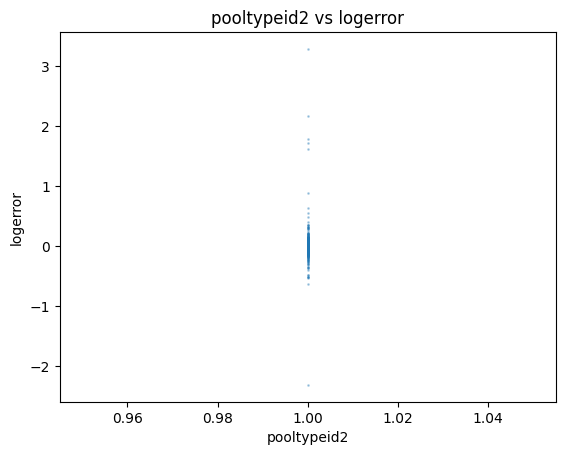

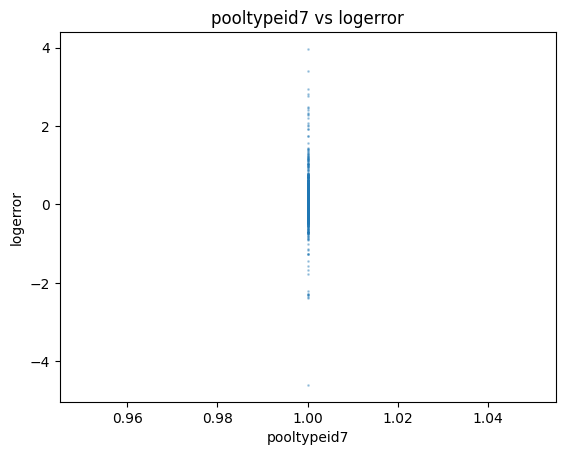

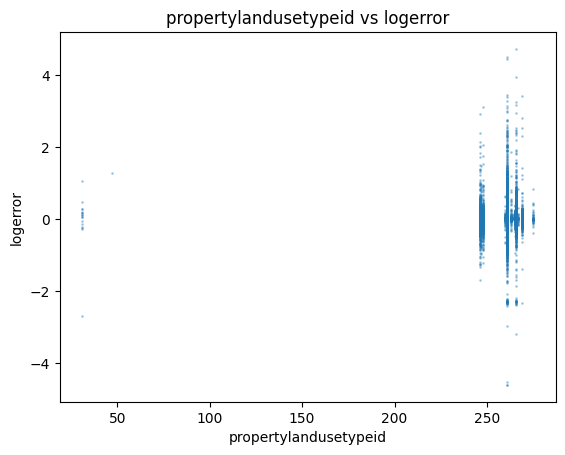

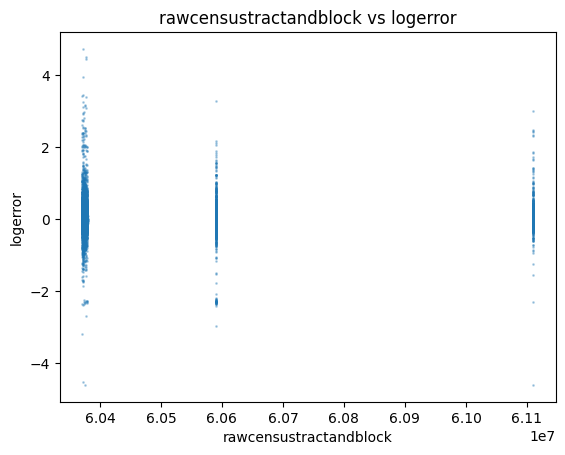

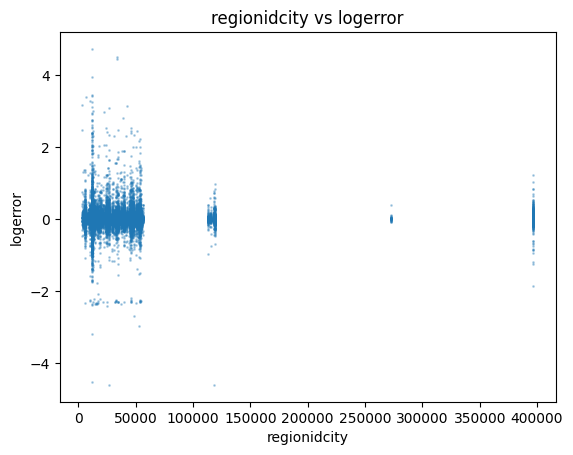

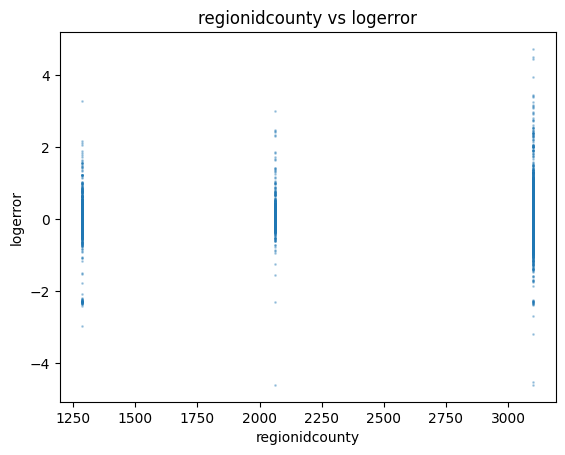

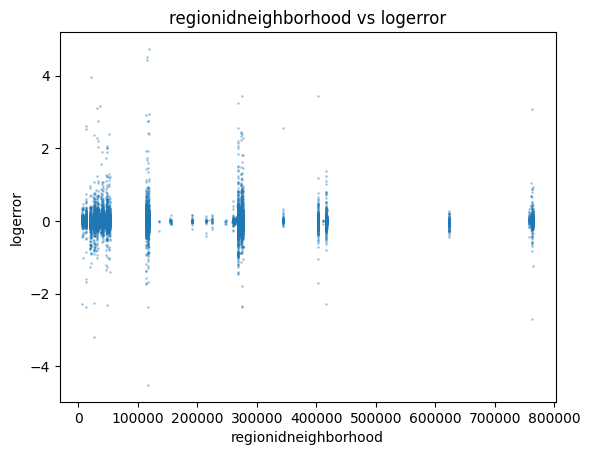

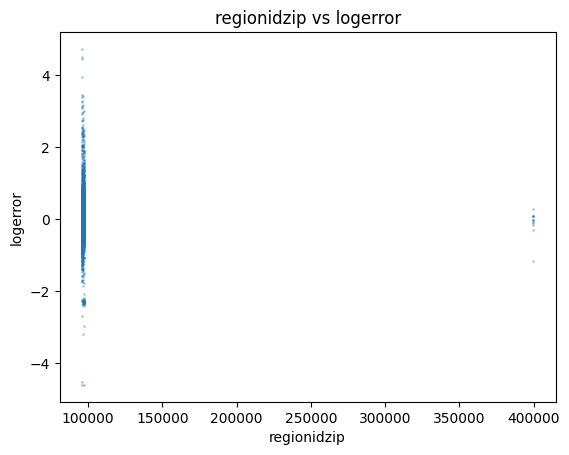

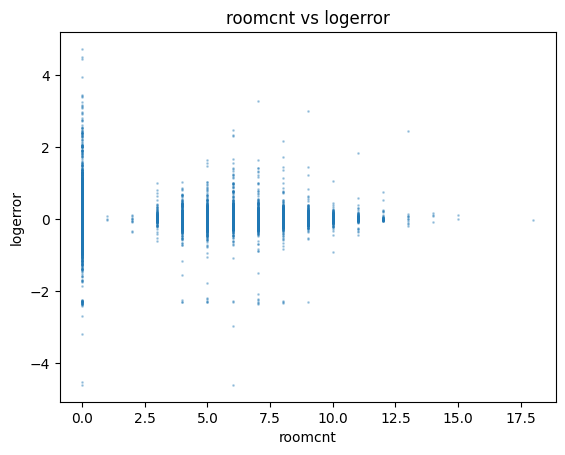

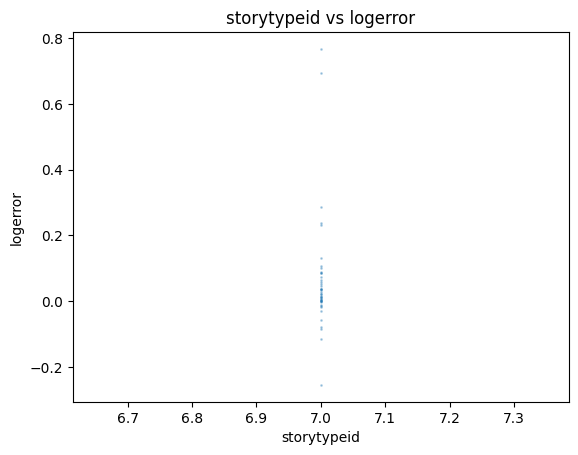

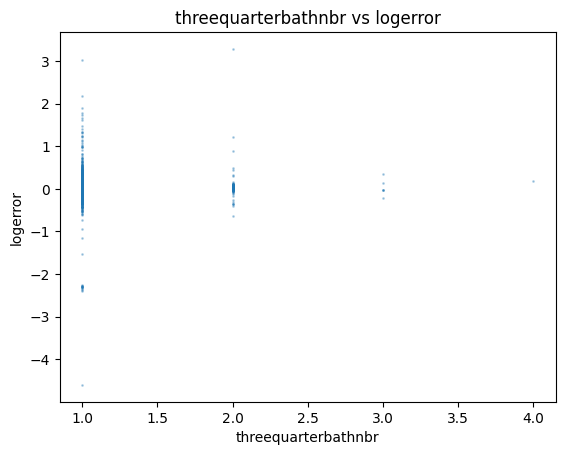

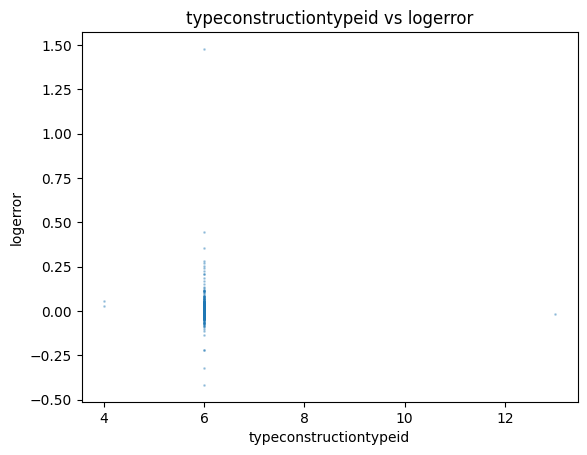

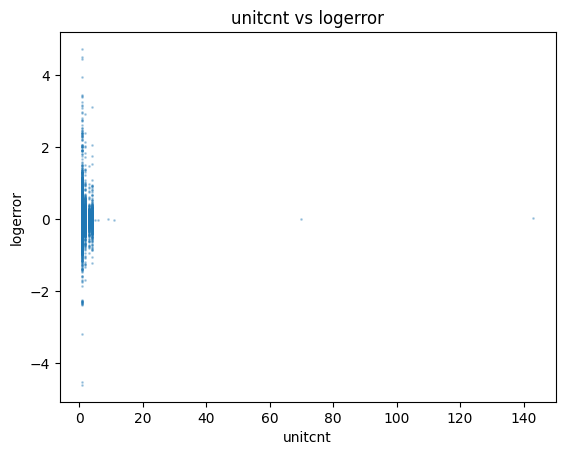

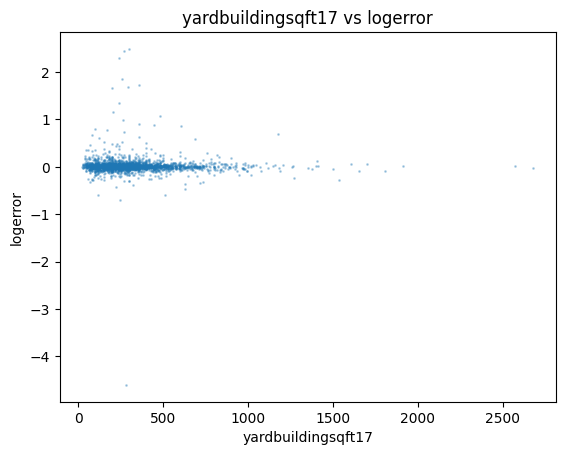

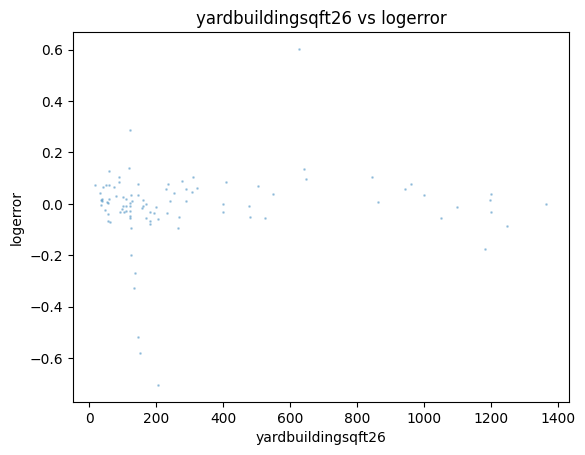

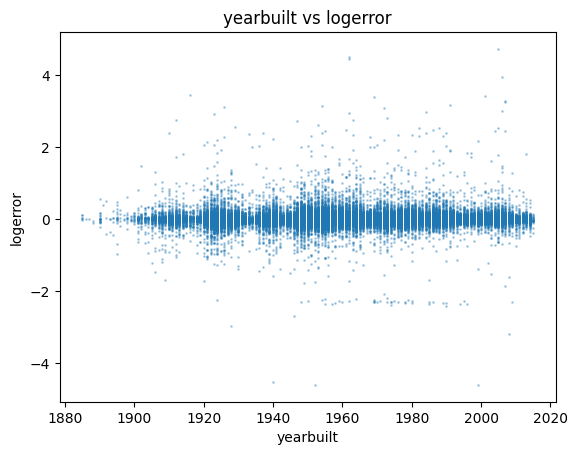

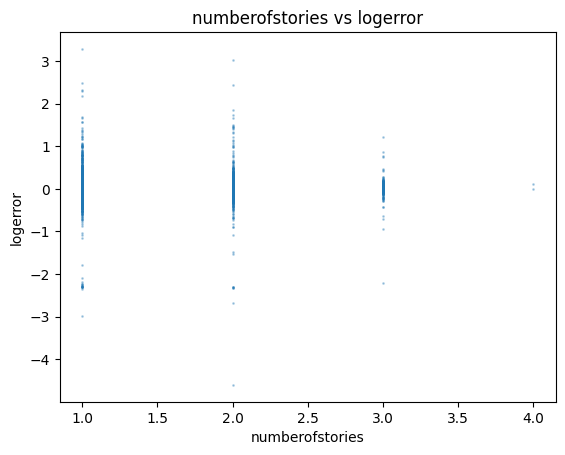

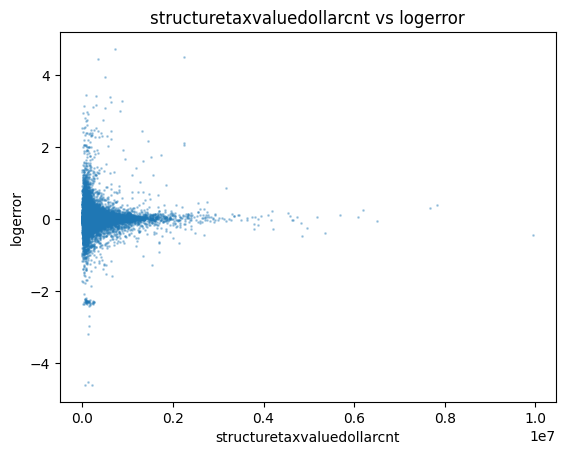

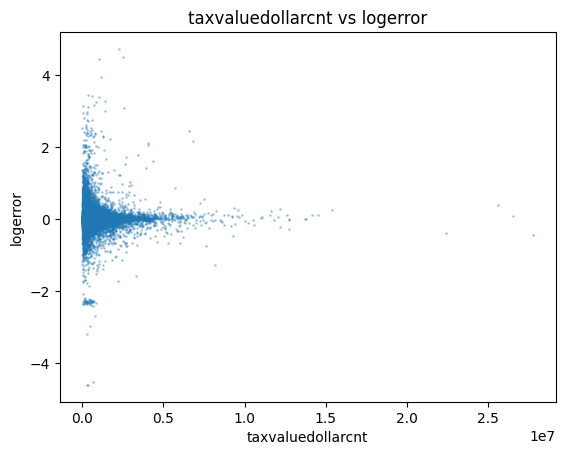

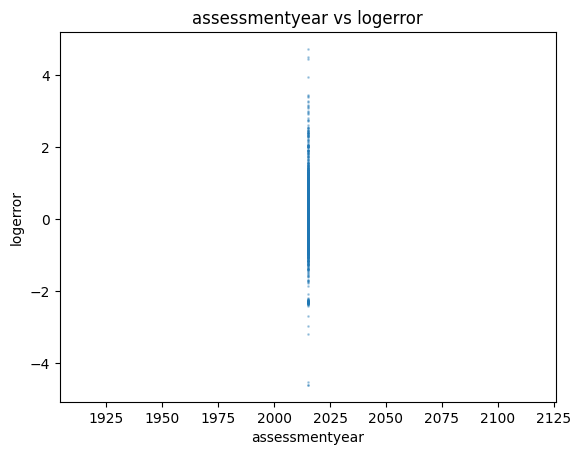

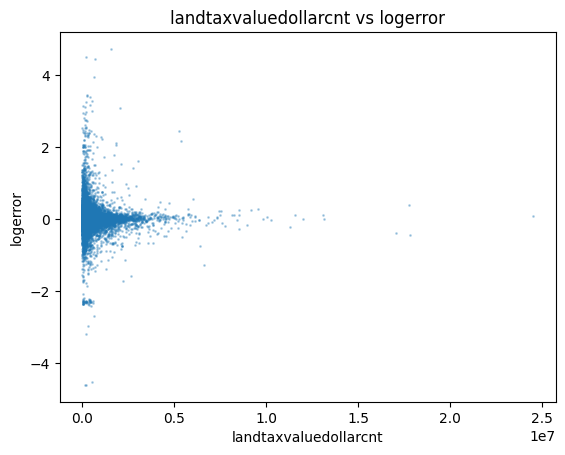

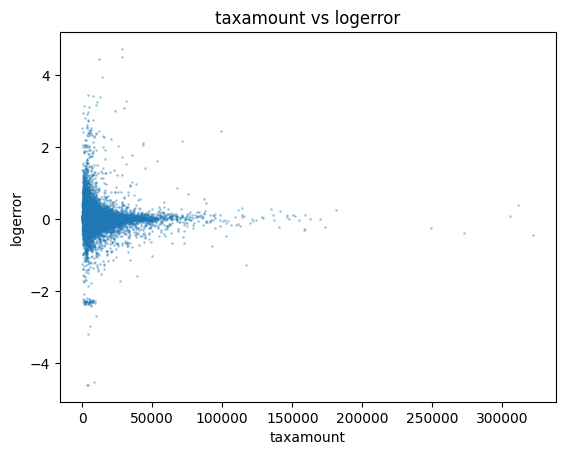

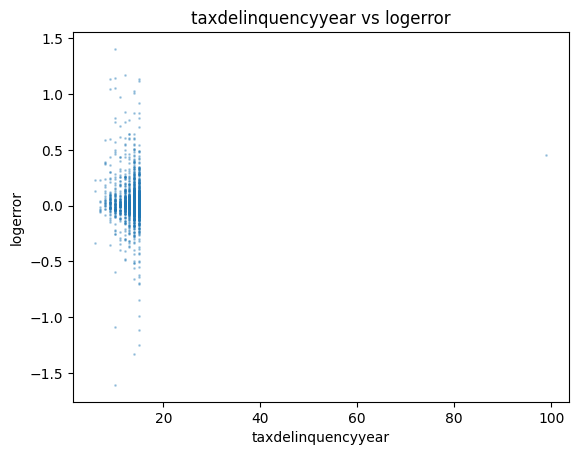

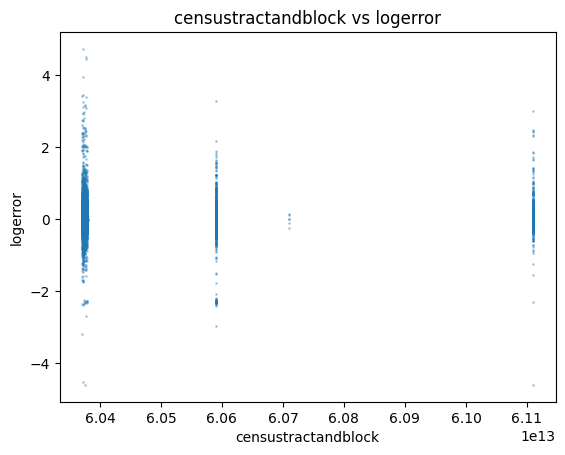

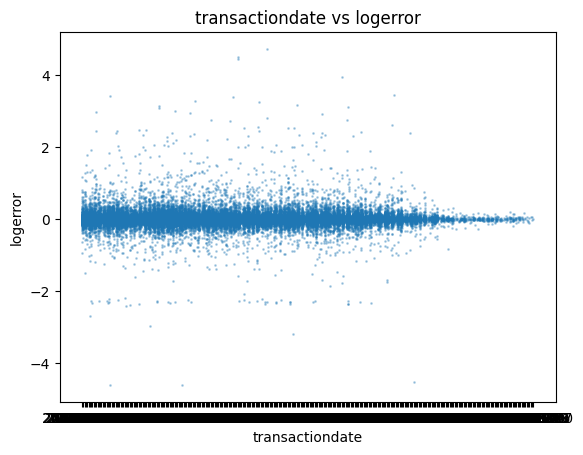

In [15]:
for column in merged_data.columns:

    if column != 'logerror' and merged_data.dtypes[column] not in ['string', 'boolean', 'NAType']:
        dot_plot_data(merged_data, column, 'logerror')

# Other useful statistic

In [7]:
print(f"Average 2016 logerror: {merged_data['logerror'].mean()}")
print(f"Median 2016 logerror: {merged_data['logerror'].median()}")
print(f"Max 2016 logerror: {merged_data['logerror'].max()}")
print(f"Min 2016 logerror: {merged_data['logerror'].min()}")


Average 2016 logerror: 0.011457219606757132
Median 2016 logerror: 0.006
Max 2016 logerror: 4.737
Min 2016 logerror: -4.605
